Todos os exercícios a seguir devem ser realizados usando a base de
dados Housing Prices (Housing Prices Dataset | Kaggle). Não podem ser
utilizadas bibliotecas além da pandas, numpy e matplotlib. A variável
price é a variável alvo e as demais variáveis são as preditivas.

# Configuração do Ambiente.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from typing import Tuple, List
from collections.abc import Iterable

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Definindo a coluna alvo
target = 'price'

# 1. Implemente o One-Hot-Encoding para as variáveis categóricas.

In [4]:
def one_hot_encoding(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aplica o One-Hot-Encoding para as variáveis categóricas do DataFrame.
    Args:
        df (pd.DataFrame): DataFrame contendo as variáveis categóricas.
    Returns:
        pd.DataFrame: DataFrame com as variáveis categóricas codificadas usando o One-Hot-Encoding.
    """
    # Tipos de colunas numéricas.
    num_types: List[str] = ['int64', 'int32', 'float64', 'float32', 'uint8',
                        'uint16', 'uint32', 'uint64', 'complex128', 'complex64']
    df_encoded = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in num_types:
            # Adiciona as colunas numéricas sem alterações.
            df_encoded[column] = df[column]
        else:  # Aplica o One Hot Encoding nas categóricas.
            values = df[column].unique()
            for value in values:
                df_encoded[f'{column}_{value}'] = (df[column] == value).astype(int)

    return df_encoded

In [5]:
df_encoded = one_hot_encoding(df)

In [6]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,1,0,1,...,1,0,1,0,2,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,1,0,1,...,1,0,1,0,3,0,1,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,...,1,0,0,1,2,1,0,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,0,...,1,0,1,0,3,1,0,1,0,0
4,11410000,7420,4,1,2,1,0,0,1,0,...,1,0,1,0,2,0,1,1,0,0


# 2. Separe o conjunto de dados em treino e teste.

In [7]:
 def train_test_split(df: pd.DataFrame, test_size: float = 0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Separa o conjunto de dados em treino e teste.
    Args:
        df (pd.DataFrame): DataFrame contendo os dados.
        test_size (float): Proporção do conjunto de dados que será usada para teste.
    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Conjunto de dados de treino e teste.
    """
    # Embaralha o DataFrame pegando uma amostra de 100% dele mesmo.
    df = df.sample(frac=1).reset_index(drop=True)
    # Separa o conjunto de dados em treino e teste
    test_size = int(df.shape[0] * test_size)
    test = df[:test_size]
    train = df[test_size:].reset_index(drop=True)

    return train, test

In [8]:
train, test = train_test_split(df_encoded)

In [9]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5873000,5500,3,1,3,1,0,0,1,1,...,1,0,1,0,1,0,1,1,0,0
1,4585000,4000,3,1,2,1,0,1,0,1,...,1,0,0,1,1,0,1,1,0,0
2,4480000,4000,3,1,2,1,0,1,0,1,...,1,0,0,1,2,0,1,1,0,0
3,2800000,2650,3,1,2,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
4,4200000,4600,3,2,2,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [10]:
test.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,mainroad_no,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_yes,airconditioning_no,parking,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2653000,4000,3,1,2,1,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
1,3360000,3500,4,1,2,1,0,1,0,1,...,1,0,1,0,2,0,1,0,0,1
2,3920000,7260,3,2,1,1,0,0,1,0,...,1,0,0,1,3,0,1,1,0,0
3,2345000,3640,2,1,1,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
4,4382000,4950,4,1,2,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0


# 3.

## a) Implemente a regressão linear ao conjunto de dados usando o método dos mínimos quadrados (OLS).

### Univariada

In [11]:
def regressao_linear(X: Iterable, y: Iterable) -> Tuple[float, float]:
    X = np.array(X)
    y = np.array(y)

    sum_xy = np.sum(X * y)
    sum_x2 = np.sum(X * X)
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    # Fórmula dos slides da aula.
    a: float = sum_xy / sum_x2
    # Fórmula encontrada na literatura.
    b: float = mean_y - a * mean_x

    return a, b

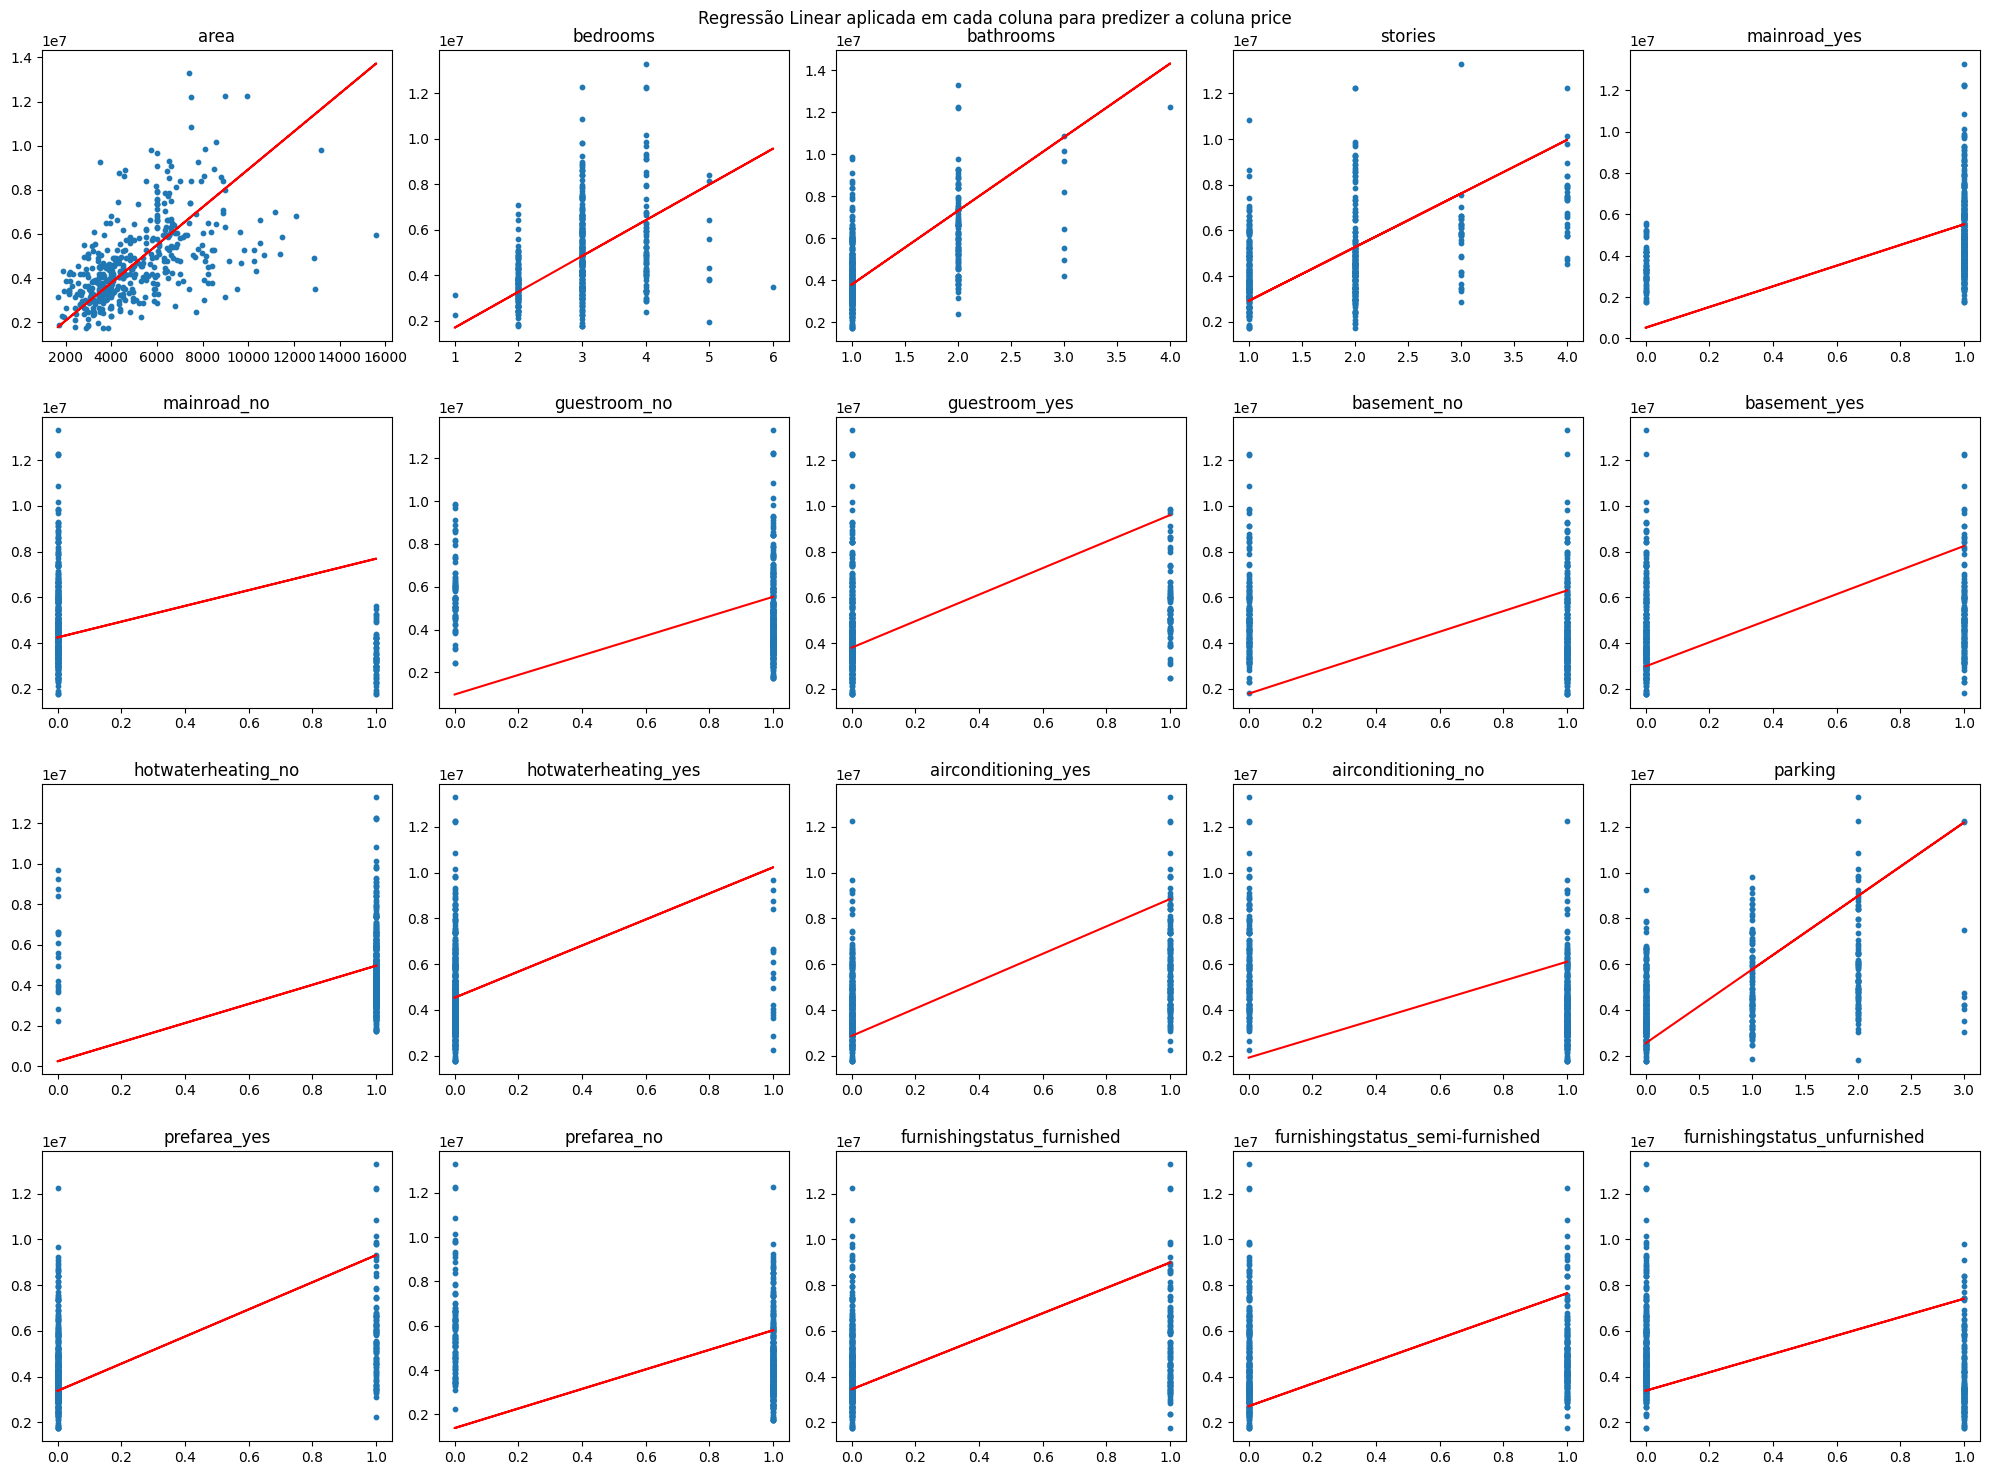

In [12]:
columns = [column for column in train.columns if column != target]

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten()
for i, column in enumerate(columns):
    X = train[column]
    y = train[target]
    a, b = regressao_linear(X, y)
    y_pred = a * X + b

    axes[i].scatter(X, y, s=10)
    axes[i].plot(X, y_pred, color='red')
    axes[i].set_title(column)

plt.suptitle(f'Regressão Linear aplicada em cada coluna para predizer a coluna {target}')
plt.tight_layout()
plt.show()

### Multivariada

In [13]:
def regressao_linear_multivariada(df: pd.DataFrame, target: str) -> float:

    y = df[target].values
    X = df.drop(target, axis=1).values

    Xt = X.T
    XtX = Xt.dot(X)
    XtX_inv = np.linalg.inv(XtX)
    Xt_y = Xt.dot(y)
    w = XtX_inv.dot(Xt_y)

    return w

In [14]:
w = regressao_linear_multivariada(train, target)
w

array([-1.02433972e+04, -5.59090982e+07,  6.47245726e+07,  9.74562225e+06,
       -6.72541578e+22, -6.72541578e+22, -6.97602774e+22, -6.97602774e+22,
        1.01888269e+23,  1.01888269e+23, -9.92636082e+21, -9.92636082e+21,
        4.36988873e+22,  4.36988873e+22,  2.28982309e+07,  1.35363957e+21,
        1.35363957e+21,  2.51658240e+07,  0.00000000e+00,  8.38860800e+06])

## b) Avalie o desempenho do modelo usando as métricas MSE e R² (você deve implementar essas métricas)

In [15]:
def mse(y: Iterable, y_pred: Iterable) -> float:

    y = np.array(y)
    y_pred = np.array(y_pred)

    mse = sum((y - y_pred)**2) / len(y)

    return mse

In [16]:
def r2(y: Iterable, y_pred: Iterable) -> float:

    y = np.array(y)
    y_pred = np.array(y_pred)
    mean_y = np.mean(y)

    sst = sum((y - y_pred)**2)
    ssr = sum((y_pred - mean_y)**2)
    r2 = 1 - sst/ssr

    return r2

### Univariada

In [17]:
columns = [column for column in train.columns if column != target]
y = test[target]
resultados = pd.DataFrame(columns=['Coluna', 'MSE', 'R²'])

for column in columns:
    a, b = regressao_linear(train[column], train[target])
    y_pred = a * test[column] + b
    resultados.loc[len(resultados)] = [column, mse(y, y_pred), r2(y, y_pred)]

resultados

,Coluna,MSE,R²
0,area,2.880942e+12,0.202520
1,bedrooms,2.630746e+12,-0.692248
2,bathrooms,3.458239e+12,-0.077509
3,stories,4.432870e+12,0.108890
4,mainroad_yes,3.934520e+12,-0.684289
5,mainroad_no,5.474038e+12,-3.955726
6,guestroom_no,8.889955e+12,-1.451375
7,guestroom_yes,6.536058e+12,-0.113560
8,basement_no,9.624971e+12,-0.954236
9,basement_yes,8.237216e+12,-0.229579


### Multivariada

In [18]:
y = test[target]
y_pred = test.drop(target, axis=1).dot(w)

In [19]:
print(f'MSE: {mse(y, y_pred)}')
print(f'R²:  {r2(y, y_pred)}')

MSE: 3224263982025839.5
R²:  -0.012193645113143248


# 4.

## a) Implemente a regressão linear ao conjunto de dados usando o método do gradiente descendente (GD). Plote a curva de aprendizagem.

In [20]:
def regressao_linear_gd(df: pd.DataFrame, target: str, alpha: float = 0.001, epochs: int = 1000, tol: float = 0.01):

    # Separa as features do target.
    y = df[target].values
    X = df.drop(target, axis=1).values

    w0 = 10  # Termo independente
    w = np.ones(X.shape[1])  # Coeficientes.
    EQM = list()  # Erro Quadrado Médio por época.

    for _ in range(epochs):
        acc = 0  # Soma do erro quadrático.
        sum_w0 = 0  # Gradiente do termo independente.
        sum_w = np.zeros(X.shape[1])  # Gradiente dos coeficientes.

        for x_i, y_i in zip(X, y):
            erro = y_i - (np.dot(w, x_i) + w0)
            sum_w0 += erro
            sum_w += erro * x_i
            acc += erro**2
        # Atualização dos pesos.
        w0 += (alpha * sum_w0) / X.shape[0]
        w  += (alpha * sum_w) / X.shape[0]
        # Listagem do erro quadrático médio.
        EQM.append(acc / X.shape[0])
        # Verifica se o erro quadrático médio se estabilizou
        if len(EQM) >= 2 and abs(EQM[-2] - EQM[-1]) < tol:
            break

    return EQM, w0, w

In [21]:
eqm, w0, w = regressao_linear_gd(train, target, epochs=30)

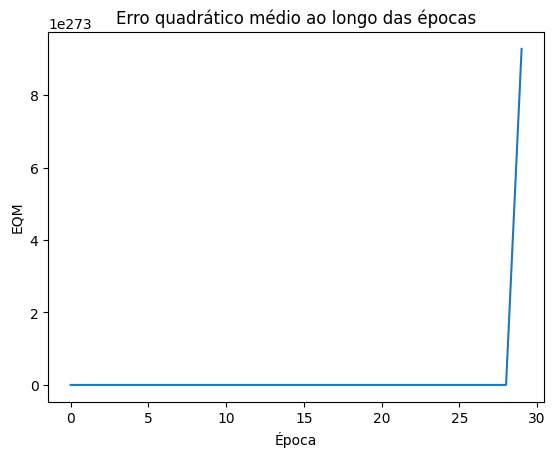

In [22]:
plt.plot(eqm)
plt.xlabel('Época')
plt.ylabel('EQM')
plt.title('Erro quadrático médio ao longo das épocas')
plt.show()

A coluna area contém valores bem discrepantes em relação as demais.
Então será um feito um teste sem esta coluna.

In [23]:
eqm, w0, w = regressao_linear_gd(train.drop('area', axis=1), target, epochs=150)

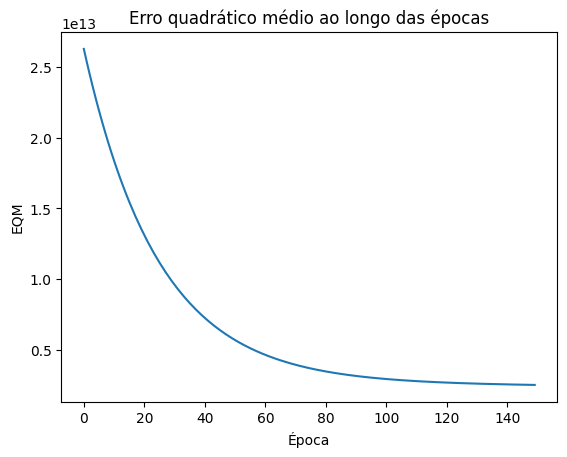

In [24]:
plt.plot(eqm)
plt.xlabel('Época')
plt.ylabel('EQM')
plt.title('Erro quadrático médio ao longo das épocas')
plt.show()

## b) Normalize as variáveis preditivas usando o método min-max e a variável alvo usando o método z-score. Repita o procedimento do item A.

### Funções

In [25]:
def normalizacao_min_max(coluna: Iterable, y1: float = 0, y2: float = 1) -> np.array:
    """
    Normaliza uma coluna usando o método min-max.
    Args:
        coluna (Iterable): Coluna a ser normalizada.
        y1 (float): Limite inferior da normalização.
        y2 (float): Limite superior da normalização.
    Returns:
        np.array: Coluna normalizada.
    """
    coluna = np.array(coluna)
    min_: float = np.min(coluna)  # Mínimo
    max_: float = np.max(coluna)  # Máximo
    #  Normalização
    coluna_normalizada: np.array = y1 + (y2 - y1) * (coluna - min_) / (max_ - min_)

    return coluna_normalizada

In [26]:
def normalizacao_z_score(coluna: Iterable) -> np.array:
    """
    Normaliza uma coluna usando o método z-score.
    Args:
        coluna (Iterable): Coluna a ser normalizada.
    Returns:
        np.array: Coluna normalizada.
    """
    coluna = np.array(coluna)
    mean: float = np.mean(coluna)  # Média
    std: float = np.std(coluna)  # Desvio padrão
    coluna_normalizada: np.array = (coluna - mean) / std  # Cálculo do Z-score

    return coluna_normalizada

### Normalização das colunas

In [27]:
train_norm = train.copy()
test_norm = test.copy()

In [28]:
features = [feature for feature in train.columns if feature != target]
# Aplica a normalização min-max nas features
for feature in features:
    train_norm[feature] = normalizacao_min_max(train[feature])
    test_norm[feature] = normalizacao_min_max(test[feature])
# Aplica a normalização Z-score na coluna target.
train_norm[target] = normalizacao_z_score(train[target])
test_norm[target] = normalizacao_z_score(test[target])

### Nova tentativa de treino

In [29]:
eqm, w0, w = regressao_linear_gd(train_norm, target)

In [30]:
print(f'Vetor de pesos obtido:\n{w}')
print(f'Termo independente: {w0}')

Vetor de pesos obtido:
[ 0.26604225 -0.16936343  0.73186874  0.24463015 -1.44084736  0.44670711
 -1.40069243  0.40655218 -0.8768044  -0.11733586 -1.84494863  0.85080837
  0.03075201 -1.02489226  0.32716216  0.2437056  -1.23784586  0.27115942
 -0.20881293 -0.05648675]
Termo independente: 7.005859744987002


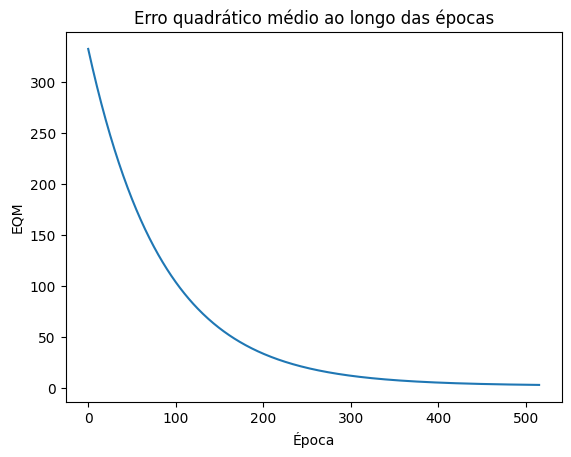

In [31]:
plt.plot(eqm)
plt.xlabel('Época')
plt.ylabel('EQM')
plt.title('Erro quadrático médio ao longo das épocas')
plt.show()

## c) Avalie o desempenho do modelo aplicado ao conjunto de dados normalizados, usando as métricas MSE e R².

In [32]:
y = test_norm[target]
y_pred = test_norm.drop(target, axis=1).dot(w) + w0

In [33]:
print(f'MSE: {mse(y, y_pred)}')
print(f'R²:  {r2(y, y_pred)}')

MSE: 3.414346934957053
R²:  0.13772542073275917


# 5. Repita os procedimentos realizados no item 4, usando o método SGD (gradiente descendente estocástico) ao invés do GD.

## Funções

In [34]:
def regressao_linear_sgd(df: pd.DataFrame, target: str, alpha: float = 0.001, epochs: int = 1000, tol: float = 0.01):

    # Separa as features do target.
    y = df[target].values
    X = df.drop(target, axis=1).values

    w0 = 10  # Termo independente
    w = np.ones(X.shape[1])  # Coeficientes.
    EQM = list()  # Erro Quadrado Médio por época.

    for _ in range(epochs):
        acc = 0  # Soma do erro quadrático.

        for x_i, y_i in zip(X, y):
            # Calcula o erro para a amostra atual
            erro = y_i - (np.dot(w, x_i) + w0)
            # Atualiza os pesos após cada amostra
            w0 += alpha * erro
            w  += alpha * erro * x_i
            # Soma do erro quadrático
            acc += erro**2

        # Calcula o erro quadrático médio para a época
        EQM.append(acc / X.shape[0])

        # Verifica se o erro quadrático médio se estabilizou
        if len(EQM) >= 2 and EQM[-2] - EQM[-1] < tol:
            break

    return EQM, w0, w


## Treinamento

In [35]:
eqm, w0, w = regressao_linear_sgd(train_norm, target)

In [36]:
print(f'Vetor de pesos obtido:\n{w}')
print(f'Termo independente: {w0}')

Vetor de pesos obtido:
[ 0.42399746 -0.30088586  0.90757159  0.57344132 -0.83669793 -0.84097196
 -1.07495394 -0.60271594 -0.86934038 -0.80832951 -1.82001602  0.14234614
 -0.48104886 -1.19662103  0.51121221 -0.52253156 -1.15513833 -0.04596638
 -0.19837487 -0.43332864]
Termo independente: 6.322330113523471


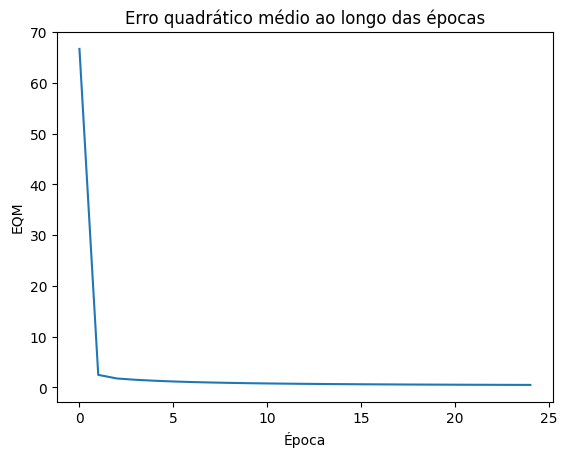

In [37]:
plt.plot(eqm)
plt.xlabel('Época')
plt.ylabel('EQM')
plt.title('Erro quadrático médio ao longo das épocas')
plt.show()

## Avaliação

In [38]:
y = test_norm[target]
y_pred = test_norm.drop(target, axis=1).dot(w) + w0

In [39]:
print(f'MSE: {mse(y, y_pred)}')
print(f'R²:  {r2(y, y_pred)}')

MSE: 0.630599105859174
R²:  0.2773321426923566


# 6. Treine 10 vezes o algoritmo GD, calculando o MSE e o R² sobre o conjunto de teste após cada iteração. Faça o mesmo com o algoritmo SGD. Faça um gráfico dos valores do MSE e R² para ambos os algoritmos. Compare esses valores com os obtidos com o método OLS. Por que esses valores variam tanto em cada treinamento? Você consegue propor uma mudança nesses algoritmos que melhore o desempenho?